### Data Description


1. sepal length in cm 
2. sepal width in cm 
3. petal length in cm 
4. petal width in cm 
5. class: 
    + Iris Setosa
    + Iris Versicolour 
    + Iris Virginica




In [1]:
## config plot size
%pylab inline
pylab.rcParams['figure.figsize'] = (16, 12)

Populating the interactive namespace from numpy and matplotlib


Importanto o dataset

In [2]:
import os 
path = os.path.join('dataset/iris')
print(os.listdir(path))

['iris.name', 'Index', 'iris.data', 'bezdekIris.data']


Load Dataset

In [3]:
import pandas as pd

data = pd.read_csv(path+'/iris.data', header=None)

In [4]:
data = data.rename_axis({0:'sepal_h', 1:'sepal_w', 2:'petal_h', 3:'petal_w', 4:'class'}, axis='columns')
data.head()

,sepal_h,sepal_w,petal_h,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualização dos dados

Essa função cria:
    - Visualiação com TSNE
    - Mapa de Calor da matriz de correlação
    - Histograma das 3 classes
    - Box plot das features

In [5]:
import seaborn
from sklearn.manifold import TSNE

def plot_iris(data, annot=True):

    # making TSNE
    plt.subplot(221)

    color_map = {'Iris-setosa':'red', 'Iris-virginica':'green', 'Iris-versicolor':'blue'}
        
    data_transform = TSNE(n_components=2).fit_transform(data.iloc[:, :-1])
    
    data_transform = pd.DataFrame(data_transform)
    data_transform['class'] = data['class']
     
    for label in np.array(data_transform):
        plt.scatter(label[0], label[1], c=color_map[label[2]])
    
    # making heatmap 
    plt.subplot(222)
    
    seaborn.heatmap(data.corr(), cmap='YlGnBu', annot=annot)
    
    # making histogram of classes
    plt.subplot(223)
    
    seaborn.countplot(y='class', data=data)
    
    # making boxplot of features
    plt.subplot(224)
    data.boxplot()
    
    plt.show()
    
    

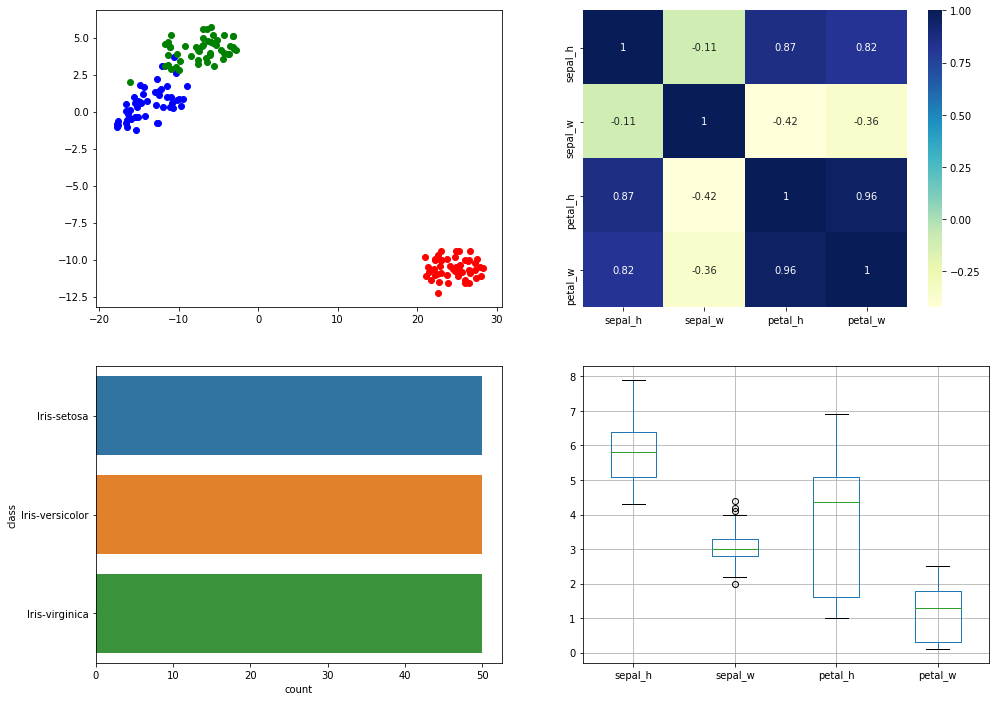

In [6]:
plot_iris(data)

### Observação

    Pelo mapa de calor da matriz de correlação percebemos que a feature 'sepal_w' não tem boa correlação com nenhuma outra, em um cenário de entrega de produto removeriamos essa feature, porém, vamos testar derivar essa feature e analisar o que acontece com suas correlações

In [7]:
data2 = data.copy()

In [8]:
data2.head()

,sepal_h,sepal_w,petal_h,petal_w,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
# making some new features
del data2['class']
data2['p_sepal'] = data2['sepal_w']/data2['sepal_h']
data2['p_petal'] = data2['petal_w']/data2['petal_h']
data2['prop1'] = data2['sepal_w']/data2['petal_w']
data2['prop2'] = data2['sepal_h']/data2['petal_h']
data2['class'] = data['class']

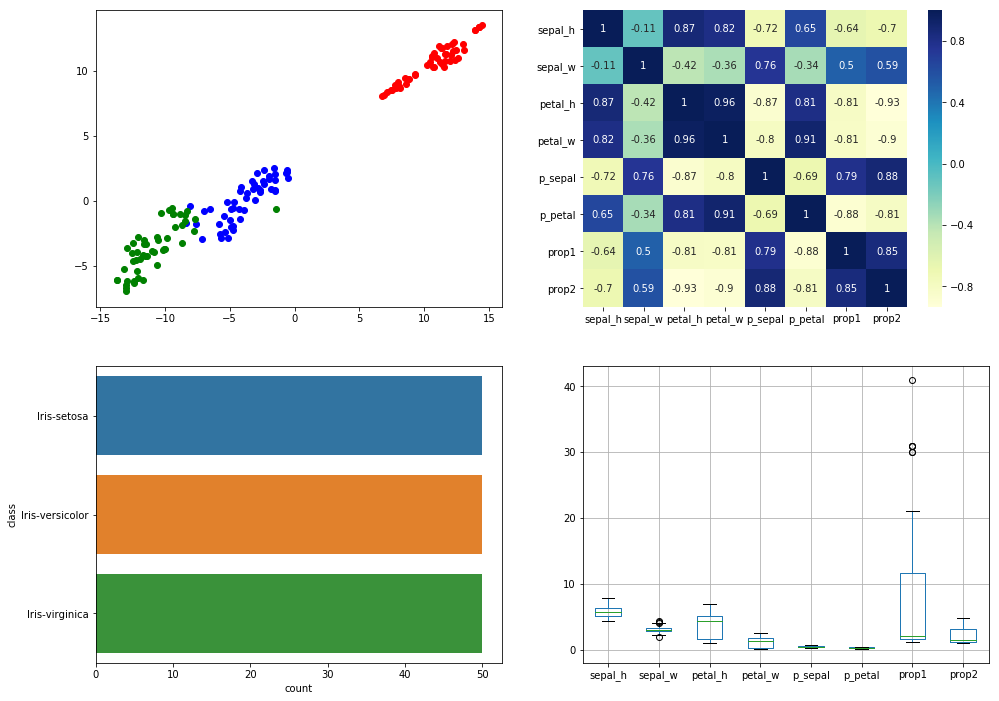

In [10]:
plot_iris(data2)

### Resultado da derivação de feature

    Derivar as features não obteve bons resultados. Nas celulas a seguir vamos testar ambos os datasets e observar seus resultados

In [11]:
# making a model test function

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix  

def test_model(X, Y, model, test_size=0.3):
    
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size)
    
    model.fit(x_train, y_train)
    
    print(model.score(x_test,y_test))
    
    print(confusion_matrix(model.predict(X),Y))
    
    

In [12]:
from sklearn.ensemble import RandomForestClassifier
test_model(data.iloc[:,:-1], data.iloc[:,-1], RandomForestClassifier())

0.955555555556
[[50  0  0]
 [ 0 49  1]
 [ 0  1 49]]


In [13]:
from sklearn.ensemble import RandomForestClassifier
test_model(data2.iloc[:,:-1], data2.iloc[:,-1], RandomForestClassifier())

0.955555555556
[[50  0  0]
 [ 0 48  0]
 [ 0  2 50]]


In [14]:
from sklearn.svm import SVC

test_model(data.iloc[:, :-1], data.iloc[:, -1], SVC())

0.955555555556
[[50  0  0]
 [ 0 47  0]
 [ 0  3 50]]


In [15]:
from sklearn.svm import SVC

test_model(data2.iloc[:, :-1], data2.iloc[:, -1], SVC())

1.0
[[50  0  0]
 [ 0 48  0]
 [ 0  2 50]]


# Considerações Finais

    Usando apenas SVM e RandomForest sem nenhuma otimização conseguimos ótimos resultados em termos de acertividade, os resultados se mantém por volta de 89% à 97% chegando em alguns pontos a 100% (overfiting), uma explica